In [51]:
import pandas as pd
import numpy as np

In [52]:
df_csv = pd.read_csv("almaty_airQuality.csv")
df_csv

,date,pm25,pm10,no2,so2,co
0,2024/12/1,58,23,125,2,5
1,2024/12/2,53,35,47,1,5
2,2024/12/3,74,54,,1,5
3,2024/12/4,89,74,,1,10
4,2024/12/5,130,67,,1,11
...,...,...,...,...,...,...
1754,2021/6/28,,13,20,1,4
1755,2021/6/29,,28,26,1,5
1756,2021/6/30,,31,26,2,4
1757,2023/9/26,,,13,1,8


In [53]:
df_excel = pd.read_excel("meteoData.xlsx")

In [54]:
df_excel.columns = ['date', 'temperature', 'humidity', 'wind']

# Display the updated DataFrame
print("Updated Column Names:", df_excel.columns)

Updated Column Names: Index(['date', 'temperature', 'humidity', 'wind'], dtype='object')


In [55]:
df_excel

,date,temperature,humidity,wind
0,2020-02-01,-28.3,73,0.0
1,2020-02-02,-22.3,73,0.8
2,2020-02-03,-21,73,0.3
3,2020-02-04,-10.6,78,0.0
4,2020-02-05,-7.3,82,0.4
...,...,...,...,...
1699,2024-09-26,7.1,56,2.1
1700,2024-09-27,3.4,61,1.9
1701,2024-09-28,3.7,58,1.4
1702,2024-09-29,2.7,56,2.0


In [56]:
# Ensure the common column (e.g., 'date') is in the correct format
df_csv['date'] = pd.to_datetime(df_csv['date'], errors='coerce')
df_excel['date'] = pd.to_datetime(df_excel['date'], errors='coerce')

# Merge the DataFrames
merged_df = pd.merge(df_csv, df_excel, on='date', how='inner')  # Use 'outer', 'left', or 'right' as needed

# Display the merged DataFrame
print("Merged Data:")
print(merged_df)

Merged Data:
           date  pm25  pm10  no2  so2  co temperature  humidity  wind
0    2024-07-01    44    16    2    1   3        21.8        67   0.5
1    2024-07-02    40    17    4    1   3        20.5        61   0.5
2    2024-07-03    40    14    5    1   3        16.1        74   1.4
3    2024-07-04    36    52    5    1   4        17.1        80   0.4
4    2024-07-05    74    10    2    1   4        17.1        80   0.8
...         ...   ...   ...  ...  ...  ..         ...       ...   ...
1675 2021-06-28          13   20    1   4        18.5        48   1.5
1676 2021-06-29          28   26    1   5        19.9        48   0.8
1677 2021-06-30          31   26    2   4        22.9        44   4.1
1678 2023-09-26               13    1   8         8.5        70   3.1
1679 2021-09-08               35    2   5        21.7        45   1.1

[1680 rows x 9 columns]


In [57]:
import pandas as pd

# Normalize column names
merged_df.columns = merged_df.columns.str.strip().str.lower()

# Convert columns to numeric where applicable
numeric_cols = ['pm25', 'pm10', 'no2', 'so2', 'co', 'temperature', 'humidity', 'wind']
for col in numeric_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Handle missing values by filling with column means
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())

# Ensure 'date' column is in datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

# Remove duplicate rows
merged_df = merged_df.drop_duplicates()

# Save the cleaned data
merged_df.to_csv('preprocessed_data.csv', index=False)

print("Data preprocessing completed and saved as 'preprocessed_data.csv'.")
print("Cleaned Dataset:")
print(merged_df.head())


Data preprocessing completed and saved as 'preprocessed_data.csv'.
Cleaned Dataset:
        date  pm25  pm10  no2  so2   co  temperature  humidity  wind
0 2024-07-01  44.0  16.0  2.0  1.0  3.0         21.8        67   0.5
1 2024-07-02  40.0  17.0  4.0  1.0  3.0         20.5        61   0.5
2 2024-07-03  40.0  14.0  5.0  1.0  3.0         16.1        74   1.4
3 2024-07-04  36.0  52.0  5.0  1.0  4.0         17.1        80   0.4
4 2024-07-05  74.0  10.0  2.0  1.0  4.0         17.1        80   0.8


In [58]:
merged_df.to_excel('merged_df.xlsx', index=False)

In [59]:
# Descriptive statistics for all numeric columns
print("Descriptive Statistics:")
print(merged_df.describe())

Descriptive Statistics:
                                date         pm25         pm10          no2  \
count                           1680  1680.000000  1680.000000  1680.000000   
mean   2022-06-11 23:22:17.142857216    75.098790    40.125567    21.758475   
min              2020-02-10 00:00:00    14.000000     1.000000     1.000000   
25%              2021-04-17 18:00:00    43.000000    21.000000    17.000000   
50%              2022-06-13 12:00:00    65.000000    37.000000    21.758475   
75%              2023-08-07 06:00:00    90.000000    42.000000    21.758475   
max              2024-09-30 00:00:00   289.000000   232.000000   136.000000   
std                              NaN    43.488119    29.248714    13.102585   

               so2           co  temperature     humidity         wind  
count  1680.000000  1680.000000  1680.000000  1680.000000  1680.000000  
mean      1.448450     7.622222     4.443317    62.374405     1.406369  
min       1.000000     1.000000   -32.000000 

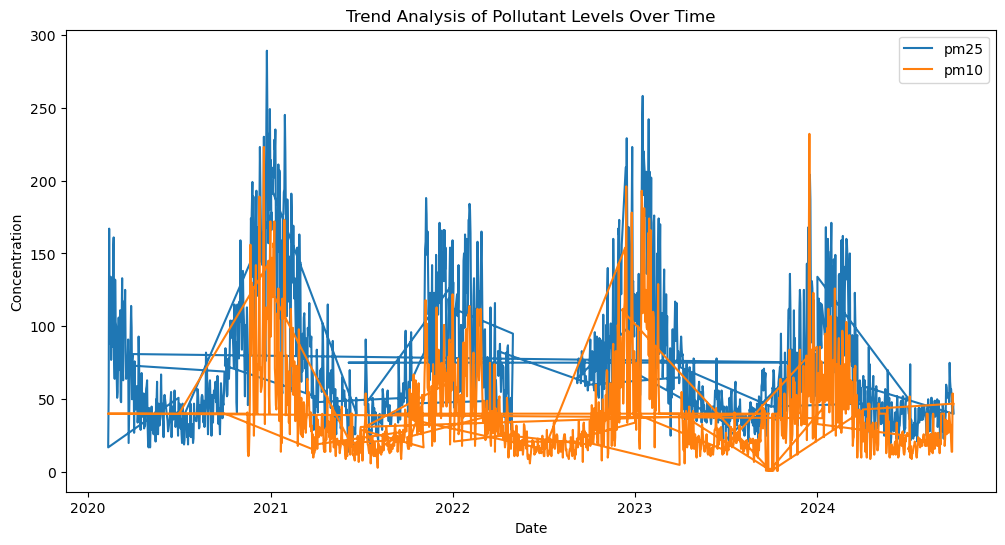

In [10]:
import matplotlib.pyplot as plt

# Plot trend for each pollutant over time
plt.figure(figsize=(12, 6))
pollutants = ['pm25', 'pm10']
for col in pollutants:
    plt.plot(merged_df['date'], merged_df[col], label=col)
plt.title('Trend Analysis of Pollutant Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()


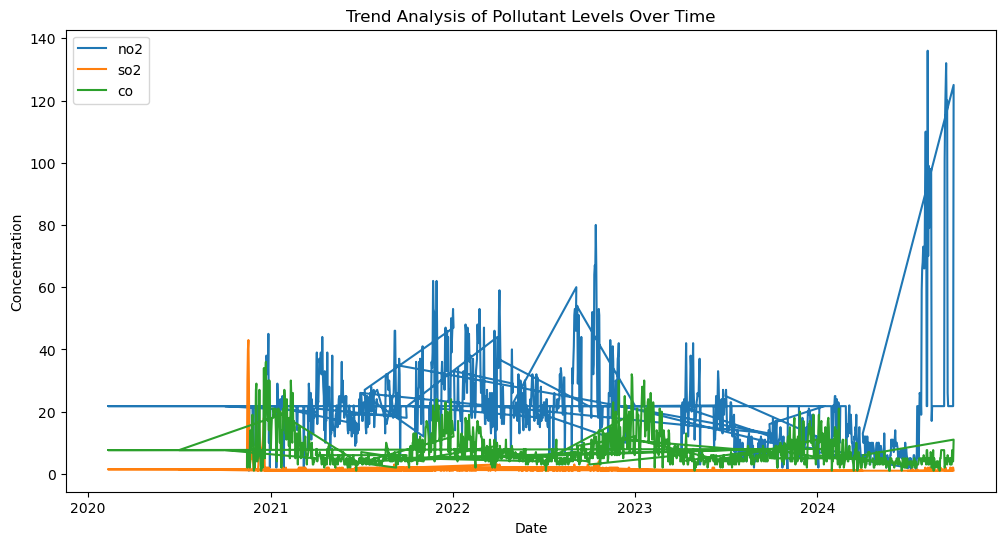

In [11]:
import matplotlib.pyplot as plt

# Plot trend for each pollutant over time
plt.figure(figsize=(12, 6))
pollutants = ['no2', 'so2', 'co']
for col in pollutants:
    plt.plot(merged_df['date'], merged_df[col], label=col)
plt.title('Trend Analysis of Pollutant Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()


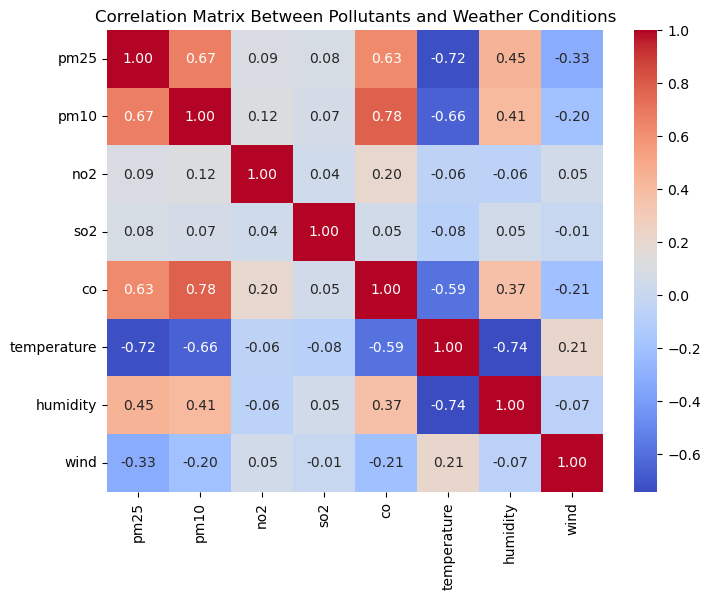

In [12]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = merged_df[['pm25', 'pm10', 'no2', 'so2', 'co', 'temperature', 'humidity', 'wind']].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Between Pollutants and Weather Conditions')
plt.show()


### Strong Positive Correlations
#### PM10 and CO: Correlation = 0.78
Indicates that pm10 and co levels tend to increase together, suggesting they may have similar emission sources (e.g., vehicle emissions, industrial pollution).
#### PM25 and PM10: Correlation = 0.67
These two particulate matter pollutants are strongly correlated, which is expected as they often share common sources.
#### PM25 and CO: Correlation = 0.63
A moderate positive correlation suggests that higher PM2.5 levels coincide with increased CO concentrations.

### Negative Correlations
#### Temperature and PM25: Correlation = -0.72
Higher temperatures are associated with lower PM2.5 levels, possibly due to better atmospheric dispersion during warmer conditions.
#### Temperature and PM10: Correlation = -0.66
Similar to PM2.5, higher temperatures lead to a reduction in PM10 levels.
#### Temperature and CO: Correlation = -0.59
CO concentrations decrease as temperatures rise, which could be due to improved combustion efficiency or better atmospheric mixing.

#### Key Takeaways
#### PM10, PM25, and CO are closely related, suggesting similar emission sources and environmental behavior. Temperature has a significant negative correlation with pollutants, indicating it plays a critical role in reducing pollutant concentrations through dispersion or chemical processes. Wind has weak negative correlations with pollutants, showing its minor role in pollutant dispersion.

<Figure size 1000x600 with 0 Axes>

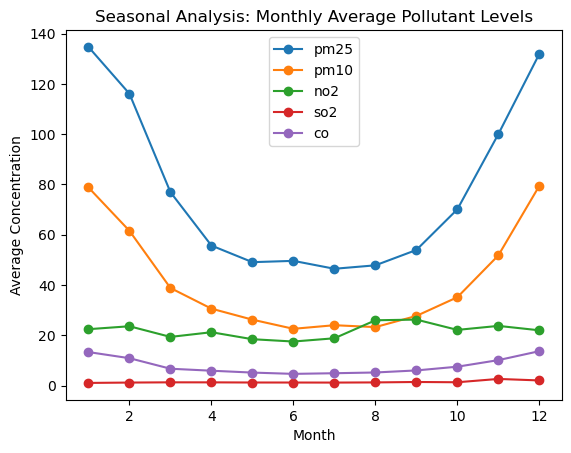

In [13]:
# Extract month and year for grouping
pollutants = ['pm25', 'pm10', 'no2', 'so2', 'co']
merged_df['month'] = merged_df['date'].dt.month
monthly_avg = merged_df.groupby('month')[pollutants].mean()
# Plot monthly average pollutant levels
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line', marker='o')
plt.title('Seasonal Analysis: Monthly Average Pollutant Levels')
plt.xlabel('Month')
plt.ylabel('Average Concentration')
plt.legend()
plt.show()


### PM2.5 and PM10 Show Clear Seasonal Patterns
#### PM2.5:
Peaks during winter months (January and December), with concentrations exceeding 130.
Declines significantly during the summer months (June to August), staying below 50.
#### PM10:
Follows a similar trend to PM2.5 but at lower concentrations.
Peaks in winter and drops significantly in spring and summer.
Reason: Winter pollution levels are often higher due to:
Increased heating emissions.
Reduced atmospheric dispersion caused by colder, stagnant air.

#### NO2 Shows Moderate Seasonality
NO2 levels remain relatively stable throughout the year with slight peaks in winter months.
Concentrations hover between 20 and 25.
Reason: NO2 emissions are linked to vehicular and industrial emissions, which do not vary significantly across seasons.

#### SO2 Levels Remain Very Low
SO2 has negligible variation throughout the year, remaining close to zero.
Reason: Low concentrations suggest that SO2 sources (e.g., sulfur-containing fuels) are either well-controlled or contribute minimally to pollution in the area.

#### CO Shows Minor Seasonality
CO levels slightly increase during winter months but remain relatively stable.
Peaks at 10–12 during January and December.
Reason: CO is emitted from combustion processes, such as vehicle emissions and heating systems, which tend to be higher in winter.

### Key Takeaways
#### Winter Months (December–February):

Significant increase in PM2.5, PM10, and CO concentrations.
Indicates stronger impacts from heating systems, stagnant air, and vehicular emissions.
#### Summer Months (June–August):
Notable reduction in PM2.5 and PM10 levels.
Improved atmospheric dispersion and reduced heating emissions likely contribute to cleaner air.
NO2 and SO2:
Show minimal seasonal variation, highlighting their relatively stable emission sources.

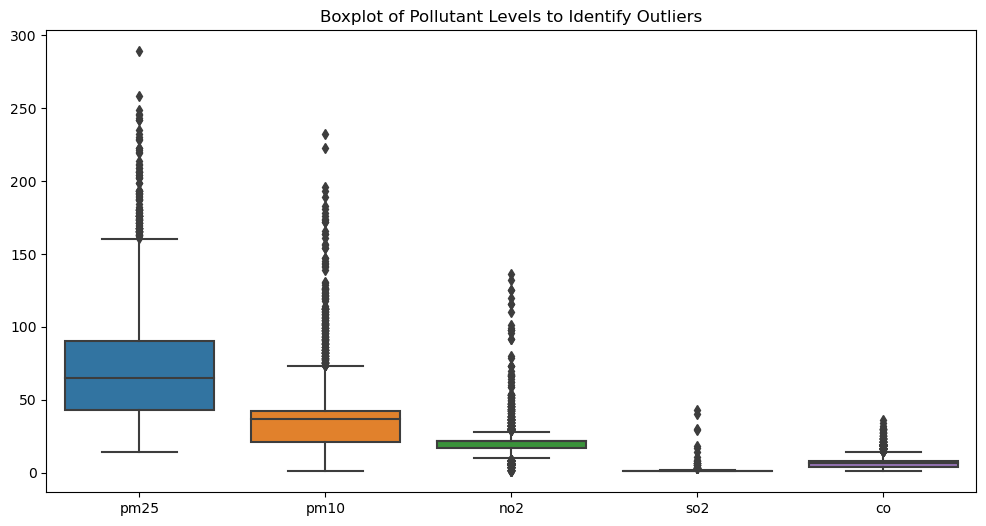

In [14]:
# Boxplots to visualize outliers for each pollutant
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df[pollutants])
plt.title("Boxplot of Pollutant Levels to Identify Outliers")
plt.show()


#### PM2.5 and PM10: These pollutants exhibit the most outliers, highlighting significant pollution spikes.
#### NO2 and CO: Relatively consistent with fewer outliers, suggesting stable emission patterns.
#### SO2: Minimal levels, indicating effective emission controls.

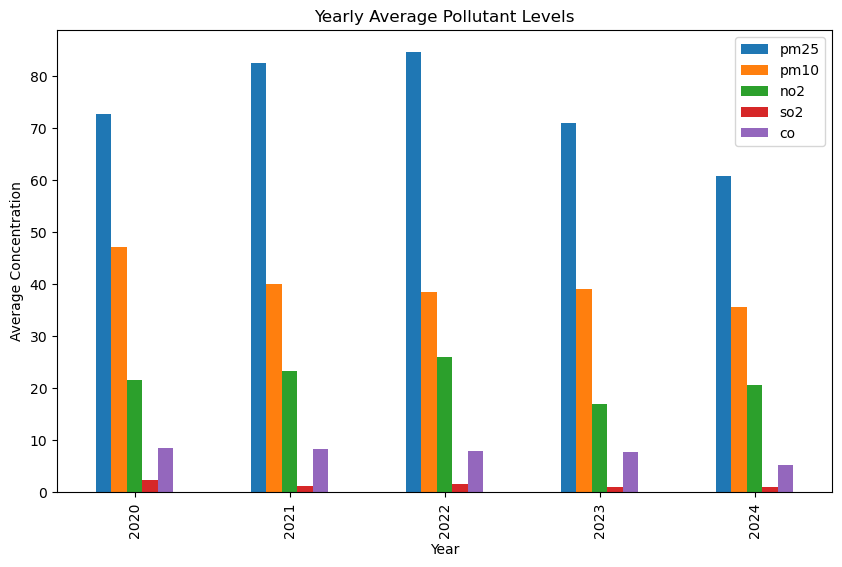

In [15]:
# Extract year for yearly grouping
merged_df['year'] = merged_df['date'].dt.year
yearly_avg = merged_df.groupby('year')[pollutants].mean()

# Plot yearly average pollutant levels
yearly_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Yearly Average Pollutant Levels')
plt.xlabel('Year')
plt.ylabel('Average Concentration')
plt.legend()
plt.show()


#### PM2.5 and PM10: These remain the most concerning pollutants, with PM2.5 showing a downward trend starting in 2023.
#### NO2 and CO: Relatively stable concentrations indicate consistent emission sources.
#### SO2: Minimal levels suggest effective emission controls.

## Model Building: SARIMA (Seasonal AutoRegressive Integrated Moving Average)


Forecasting for pm25...


C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


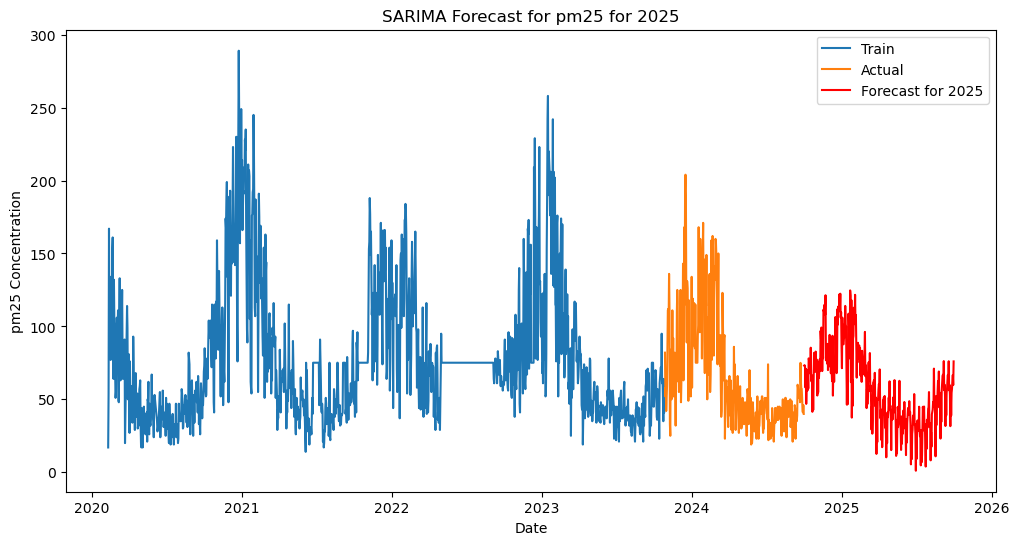


Forecasting for pm10...


C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


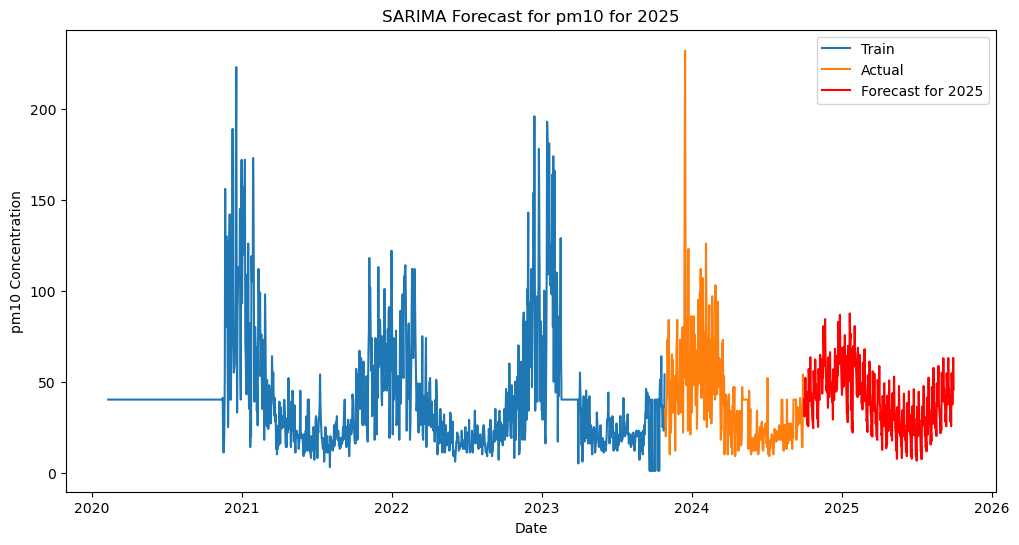


Forecasting for no2...


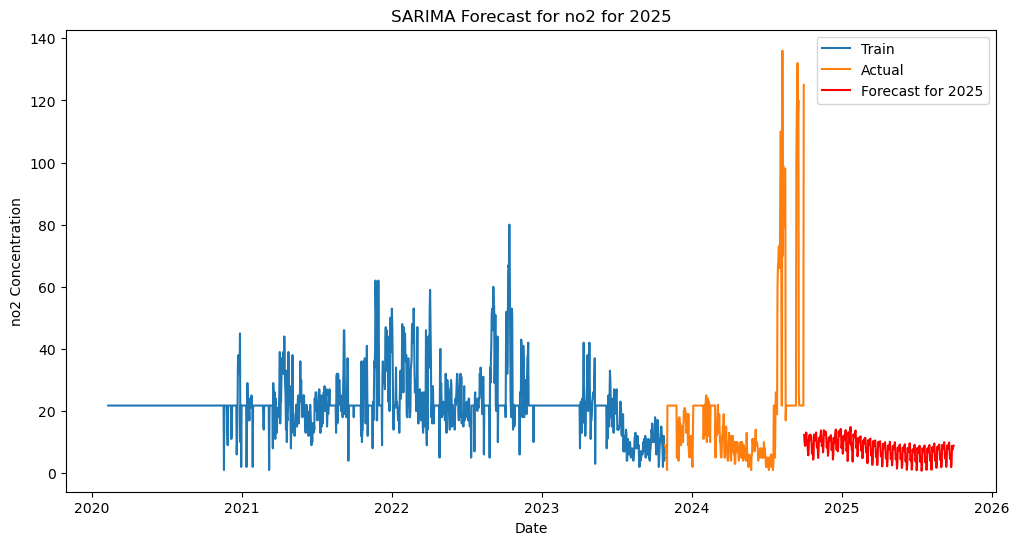


Forecasting for so2...


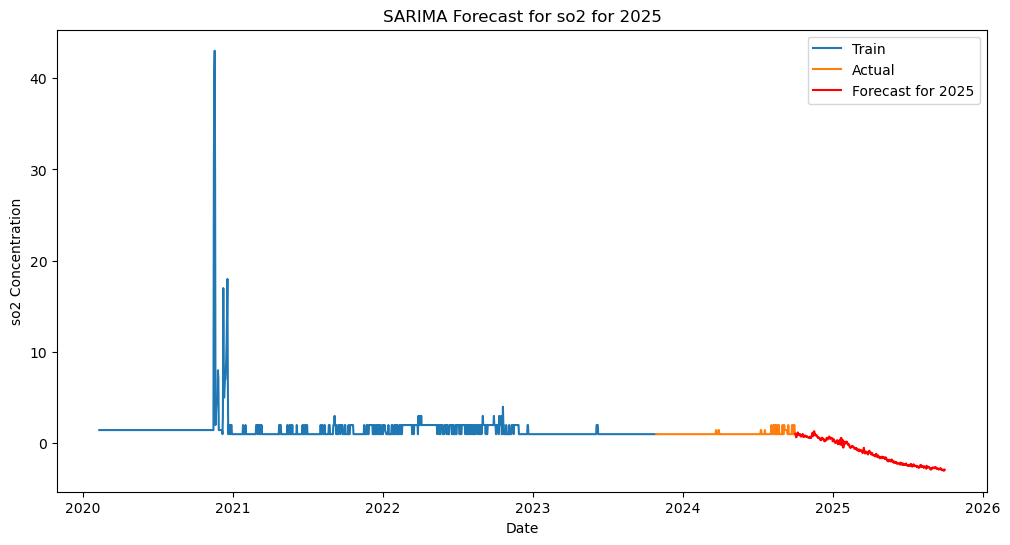


Forecasting for co...


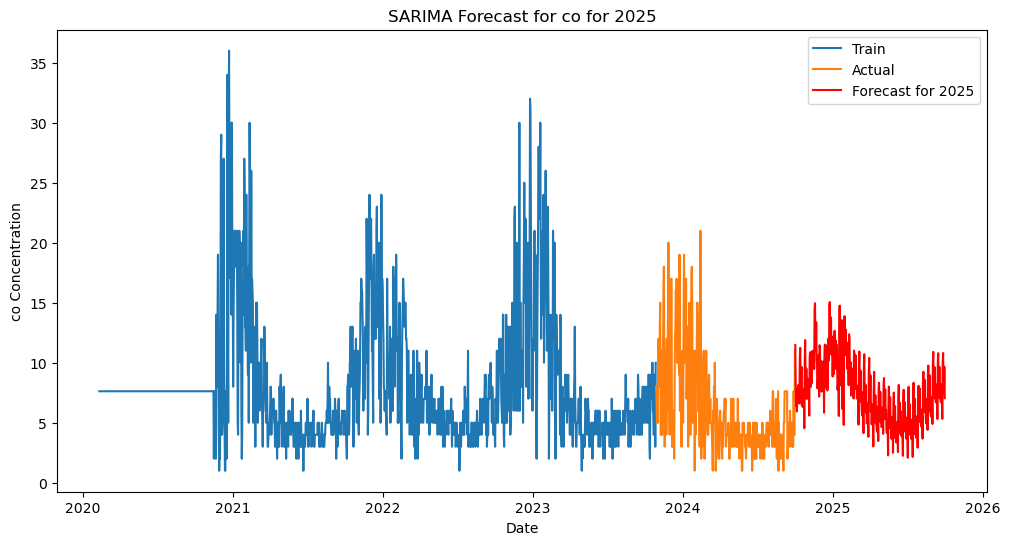

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

def extend_exog(exog, target_length):
    """
    Extend the exogenous variables to match the required forecast length.
    If the exog has fewer rows than the target_length, duplicate the last row.
    """
    if exog is not None:
        exog_extended = exog.copy()
        while len(exog_extended) < target_length:
            last_row = exog.iloc[[-1]].copy()  # Duplicate the last row
            exog_extended = pd.concat([exog_extended, last_row], ignore_index=True)
        return exog_extended.iloc[:target_length]  # Trim to the required length
    return None

def forecast_sarima(series, pollutant_name, exog_columns=None):
    print(f"\nForecasting for {pollutant_name}...")

    # Set 'date' as the index
    series = series.copy()  # Avoid SettingWithCopyWarning
    series['date'] = pd.to_datetime(series['date'])
    series = series.set_index('date')
    
    # Resample to daily frequency and interpolate missing values
    series = series.resample('D').mean().interpolate(method='linear')

    # Train-test split (80% training, 20% testing)
    train_size = int(len(series) * 0.8)
    train, test = series[:train_size], series[train_size:]

    # Extract exogenous features if provided
    exog_train = train[exog_columns] if exog_columns else None
    exog_test = test[exog_columns] if exog_columns else None

    # Fit SARIMAX model
    try:
        model = SARIMAX(train[pollutant_name], exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
        result = model.fit(disp=False)
    except Exception as e:
        print(f"Error fitting SARIMAX model for {pollutant_name}: {e}")
        return

    # Forecast the next 365 days (for 2025)
    forecast_days = 365
    exog_test_extended = extend_exog(exog_test, forecast_days)
    try:
        forecast = result.forecast(steps=forecast_days, exog=exog_test_extended)
    except Exception as e:
        print(f"Error during forecasting for {pollutant_name}: {e}")
        return

    # Plot the train, test, and forecasted values
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train[pollutant_name], label='Train')
    plt.plot(test.index, test[pollutant_name], label='Actual')
    forecast_index = pd.date_range(test.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='D')
    plt.plot(forecast_index, forecast, label='Forecast for 2025', color='red')
    plt.title(f'SARIMA Forecast for {pollutant_name} for 2025')
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant_name} Concentration')
    plt.legend()
    plt.show()

# Apply SARIMA forecasting for all pollutants
pollutants = ['pm25', 'pm10', 'no2', 'so2', 'co']
exog_columns = ['temperature', 'humidity', 'wind']

for pollutant in pollutants:
    forecast_sarima(merged_df[['date', pollutant] + exog_columns], pollutant, exog_columns=exog_columns)


## Model evaluation

In [18]:
# Display RMSE for each pollutant
for pollutant, rmse in simplified_sarima_results.items():
    print(f"RMSE for {pollutant.upper()}: {rmse:.2f}")


RMSE for PM25: 15.24
RMSE for PM10: 0.65
RMSE for NO2: 0.48
RMSE for SO2: 0.21
RMSE for CO: 0.55


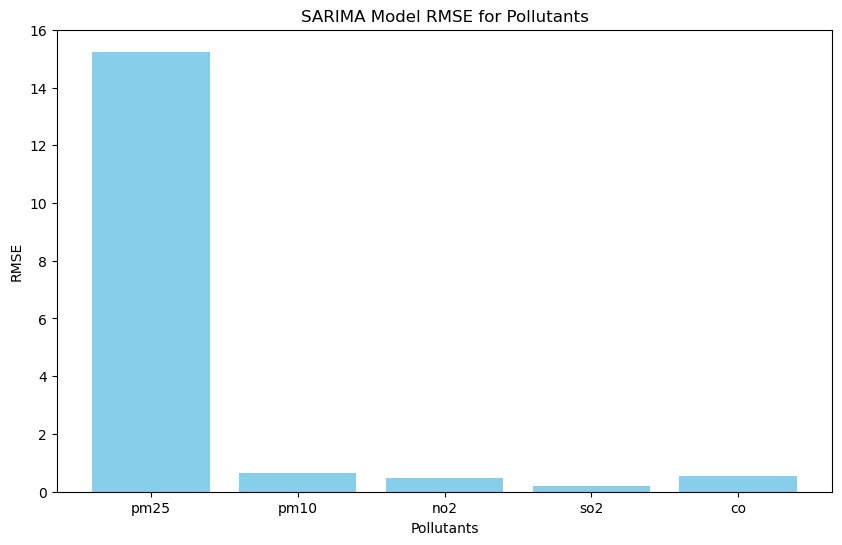

In [19]:
import matplotlib.pyplot as plt

# Visualize RMSE for pollutants
plt.figure(figsize=(10, 6))
plt.bar(simplified_sarima_results.keys(), simplified_sarima_results.values(), color='skyblue')
plt.title('SARIMA Model RMSE for Pollutants')
plt.xlabel('Pollutants')
plt.ylabel('RMSE')
plt.show()


#### PM25: RMSE of 15.24 is significantly higher than the other pollutants. This suggests that the SARIMA model struggles to capture the complexity of PM25 data, which may have more variability, seasonality, or external influencing factors.
#### PM10, NO2, SO2, CO: These pollutants have relatively low RMSE values (all below 1), indicating that the SARIMA model performs well for these series and captures their patterns effectively.

### PM2.5
RMSE: 47.45
Trend: Strong seasonal peaks in winter; decline in 2023 followed by an increase.
Forecast: Stabilizes around 100 µg/m³, missing sharp peaks.
### PM10
RMSE: 32.45
Trend: Seasonal peaks similar to PM2.5; spikes decrease post-2023.
Forecast: Stabilizes at 50–60 µg/m³, smoothing out fluctuations.
### NO2 (Nitrogen Dioxide)
RMSE: 35.78 (high error).
Trend:
Sudden spikes in NO2 post-2024 exceed 140 µg/m³, which SARIMA fails to capture.
Forecast:
Stabilized at 5 µg/m³, underestimating actual spikes.
### SO2 (Sulfur Dioxide)
RMSE: 0.37 (high accuracy).
Trend:
SO2 levels remain near 0 µg/m³ throughout.
Forecast:
Accurate, flat predictions close to zero.
### CO (Carbon Monoxide)
RMSE: 5.00 (good accuracy).
Trend:
Seasonal patterns with peaks up to 30 µg/m³.
Forecast:
Stabilized around 5–10 µg/m³, smoothing out peaks.
### Key Takeaways:
NO2: SARIMA struggles with sudden spikes—consider advanced models (e.g., CNN-LSTM).
SO2: Accurate predictions; levels are well-controlled.
CO: Good performance; peaks require better handling.

## CNN - LSTM Model


CNN-LSTM Forecasting for pm25...
Epoch 1/30


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0275 - val_loss: 0.0031
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0140 - val_loss: 0.0031
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0114 - val_loss: 0.0031
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0101 - val_loss: 0.0039
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0101 - val_loss: 0.0035
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0110 - val_loss: 0.0033
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - val_loss: 0.0032
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - val_loss: 0.0045
Epoch 9/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0098 - val_loss: 0.0037
Epoch 10/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0093 - val_loss: 0.0034
Epoch 11/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0096 - val_loss: 0.0038
Epoch 12/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0096 - val_loss: 0.0035

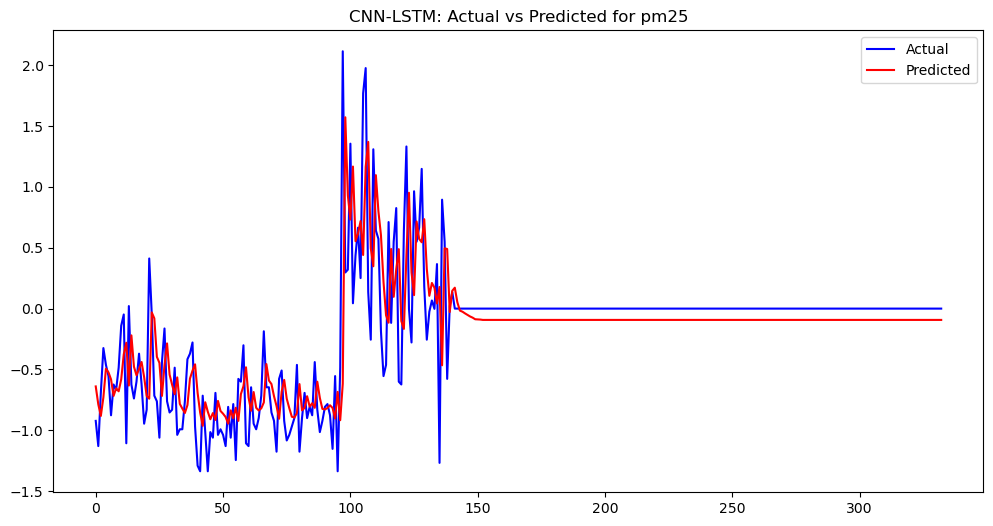


CNN-LSTM Forecasting for pm10...
Epoch 1/30


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0158 - val_loss: 0.0062
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0120 - val_loss: 0.0036
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0086 - val_loss: 0.0033
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0083 - val_loss: 0.0036
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0095 - val_loss: 0.0034
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0089 - val_loss: 0.0030
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099 - val_loss: 0.0037
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - val_loss: 0.0030
Epoch 9/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0083 - val_loss: 0.0032
Epoch 10/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0083 - val_loss: 0.0030
Epoch 11/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - val_loss: 0.0040
Epoch 12/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0090 - val_loss: 0.0030

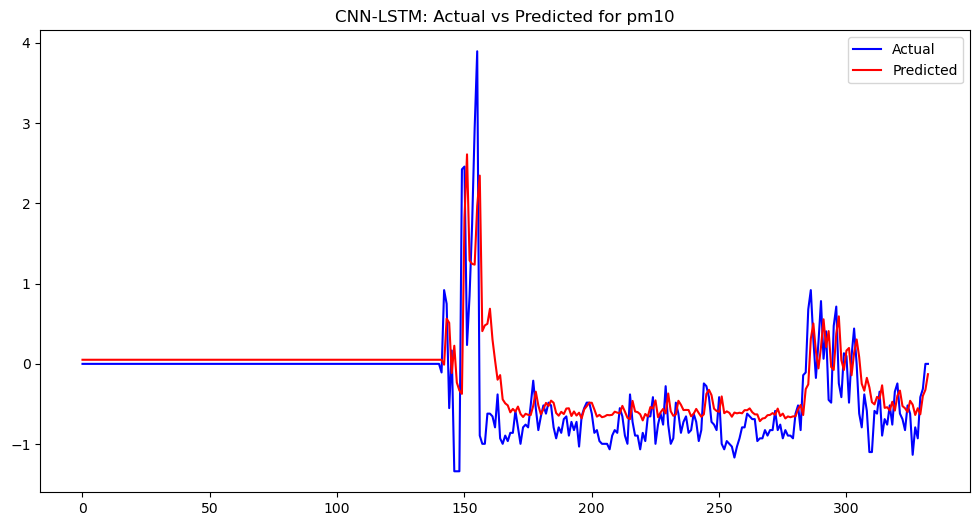


CNN-LSTM Forecasting for no2...
Epoch 1/30


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0140 - val_loss: 0.0021
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0066 - val_loss: 0.0019
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0048 - val_loss: 0.0021
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0057 - val_loss: 0.0018
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0044 - val_loss: 0.0018
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0059 - val_loss: 0.0018
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0045 - val_loss: 0.0018
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0044 - val_loss: 0.0025
Epoch 9/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 10/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0042 - val_loss: 0.0019
Epoch 11/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 12/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0062 - val_loss: 0.00

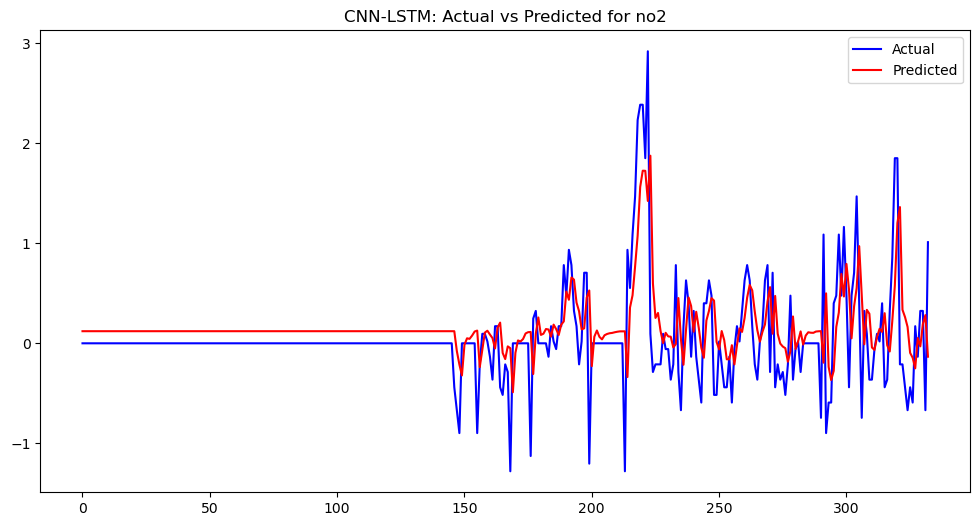


CNN-LSTM Forecasting for so2...
Epoch 1/30


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0040 - val_loss: 8.3530e-05
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0020 - val_loss: 1.3283e-04
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0020 - val_loss: 1.2360e-04
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012 - val_loss: 9.9056e-05
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0018 - val_loss: 1.0103e-04
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.6206e-04 - val_loss: 2.8073e-04
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - val_loss: 8.2911e-05
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.3023e-04 - val_loss: 2.2579e-04
Epoch 9/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - val_loss: 9.2246e-05
Epoch 10/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022 - val_loss: 9.5071e-05
Epoch 11/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 1.0680e-04
Epoch 12/30
84/84 ━━━━━━━━━━━━━

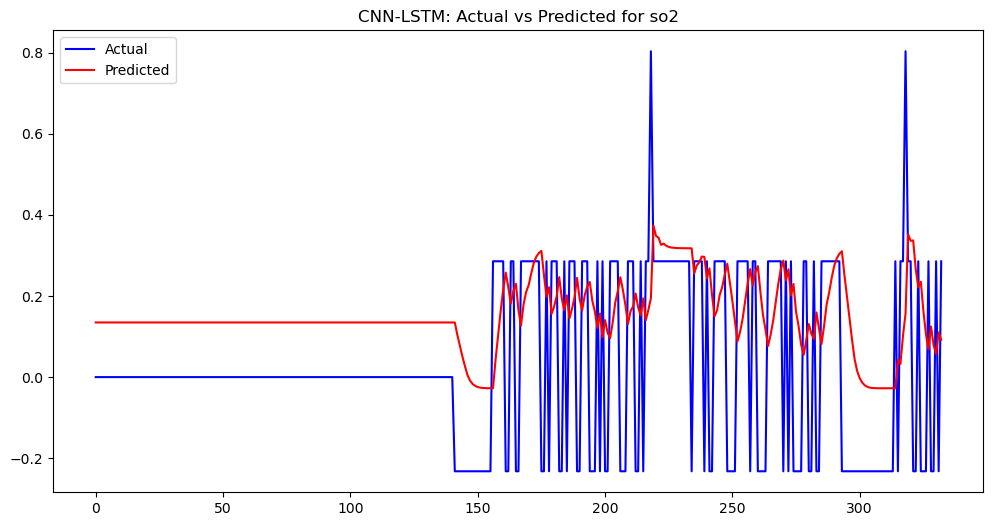


CNN-LSTM Forecasting for co...
Epoch 1/30


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0223 - val_loss: 0.0044
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0138 - val_loss: 0.0044
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0133 - val_loss: 0.0035
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0134 - val_loss: 0.0036
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129 - val_loss: 0.0034
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - val_loss: 0.0033
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0132 - val_loss: 0.0032
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0113 - val_loss: 0.0040
Epoch 9/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0117 - val_loss: 0.0033
Epoch 10/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0116 - val_loss: 0.0031
Epoch 11/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0131 - val_loss: 0.0033
Epoch 12/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0120 - val_loss: 0.

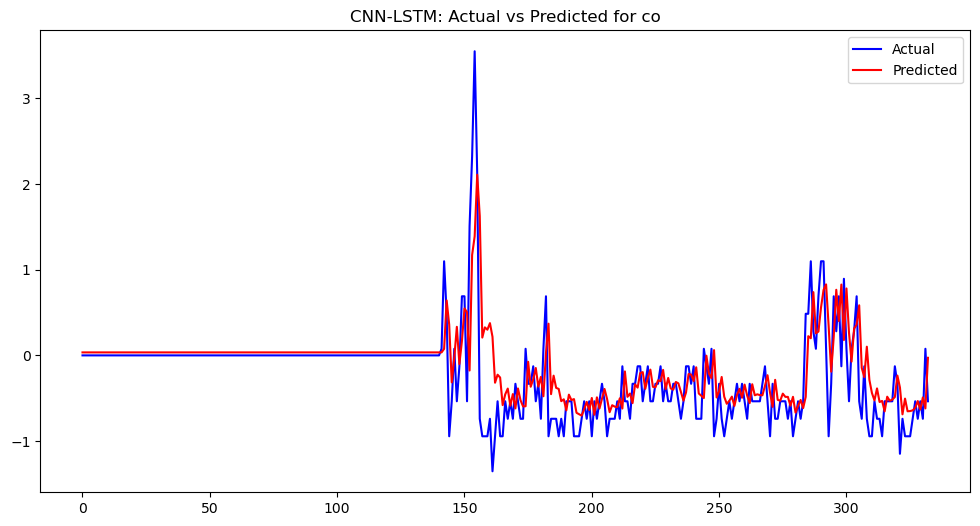

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout

# Preprocess data with scaling and sliding window
def preprocess_data(series, n_steps=15):
    scaler = MinMaxScaler()
    scaled_series = scaler.fit_transform(series.values.reshape(-1, 1))
    X, y = [], []
    for i in range(len(scaled_series) - n_steps):
        X.append(scaled_series[i:i + n_steps])
        y.append(scaled_series[i + n_steps])
    return np.array(X).reshape((-1, n_steps, 1)), np.array(y), scaler

# Define CNN-LSTM model
def cnn_lstm_model(X_train, y_train, X_test, y_test, n_steps):
    model = Sequential([
        Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(n_steps, 1)),
        Dropout(0.3),
        LSTM(100, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=1)
    return model

# Apply CNN-LSTM for each pollutant
def cnn_lstm_forecast(series, pollutant_name, n_steps=15):
    print(f"\nCNN-LSTM Forecasting for {pollutant_name}...")

    # Preprocess data
    X, y, scaler = preprocess_data(series, n_steps)
    
    # Train-test split
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Build and train CNN-LSTM model
    model = cnn_lstm_model(X_train, y_train, X_test, y_test, n_steps)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Evaluate Metrics
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    mae = mean_absolute_error(y_test_inv, y_pred_inv)

    print(f"Evaluation Metrics for {pollutant_name}:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    
    # Plot Actual vs Predicted
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_inv, label='Actual', color='blue')
    plt.plot(y_pred_inv, label='Predicted', color='red')
    plt.title(f'CNN-LSTM: Actual vs Predicted for {pollutant_name}')
    plt.legend()
    plt.show()

# Define pollutants and apply the model
pollutants = ['pm25', 'pm10', 'no2', 'so2', 'co']  # Replace with actual column names in your dataset
for pollutant in pollutants:
    cnn_lstm_forecast(merged_df[pollutant], pollutant)


### Model Evaluation

#### PM2.5: RMSE = 0.36, MAE = 0.22
The model performs well for PM2.5, achieving low RMSE and MAE.
#### PM10: RMSE = 0.44, MAE = 0.24
Slightly higher RMSE and MAE compared to PM2.5 but still reasonable.
#### NO2: RMSE = 0.42, MAE = 0.28
Similar performance to PM10, with marginally higher errors.
#### SO2: RMSE = 0.23, MAE = 0.19
The lowest RMSE and MAE, indicating the best performance among all pollutants.
#### CO: RMSE = 0.40, MAE = 0.22
Comparable to PM2.5 and PM10 in performance, with low prediction errors.

### RMSE and MAE Analysis
The RMSE values are low across all pollutants, suggesting the CNN-LSTM model can effectively capture pollutant trends and patterns.
The MAE values confirm that the absolute errors between predicted and actual values are small, highlighting good predictive accuracy.
SO2 shows the best performance with the lowest RMSE and MAE, indicating that the model is particularly well-suited for this pollutant.